# Tutorial 1: Introduction to Machine Learning with Python

The goal of this tutorial is to introduce a typical workflow in carrying out ML in Python. This includes, 

1. accessing and organising data,

2. assessing the data,

3. visualising the data,

4. a) creating training, b) test datasets and c) learning a model using them and evaluating its performance. 

In [2]:
#Imy commented on the dataset to understand/from going through the sheet with the practical co-ordinators
import numpy as np
import pandas

from matplotlib import pyplot as plt

%matplotlib inline #Particular for jupyter notebook - makes sure that plots are plotted inside the same window, like this

# Set the default figure size.
plt.rcParams["figure.figsize"] = (10, 8) #Sets the standard figure size for plotting as the standard is quite small

## 1) Load Data 

Here, we shall load the Iris dataset from a publically available source. 

This dataset consists of 150 samples of 3 classes of iris plants; each datapoint consists of 4 attributes, the 'sepal-length', 'sepal-width', 'petal-length' and'petal-width'. 

Once the data has been downloaded, we can organise them into their classes.

In [44]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

# if loading from web doesn't work, this file is already stored in the repository. Uncomment following if necessary.
# url = "./iris.csv"

column_names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

raw_dataset = pandas.read_csv(url, names=column_names)

# print the raw dataset
print(raw_dataset) #Print the baseline dataset

# Organise data by class
dataset = raw_dataset.groupby('class')
#print(*dataset)

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0        

## 2) Statistics of the dataset

Pandas has some convenience methods that allow us to easily calculate statistical properties of a dataset.

In [4]:
# Calculate the mean of each attribute. E.g

dataset.mean()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [5]:
# Calculate the standard deviation of each attribute
dataset.std()


,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [6]:
# Show the minimum of each attribute
dataset.min()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,4.3,2.3,1.0,0.1
Iris-versicolor,4.9,2.0,3.0,1.0
Iris-virginica,4.9,2.2,4.5,1.4


In [7]:
# Show the maximum of each attribute
dataset.max()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,5.8,4.4,1.9,0.6
Iris-versicolor,7.0,3.4,5.1,1.8
Iris-virginica,7.9,3.8,6.9,2.5


## 3) Visualise the dataset

Pandas has some convenience functions that allow us to easily visualise our dataset.

[This is the documentation for the basic plotting tools available in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

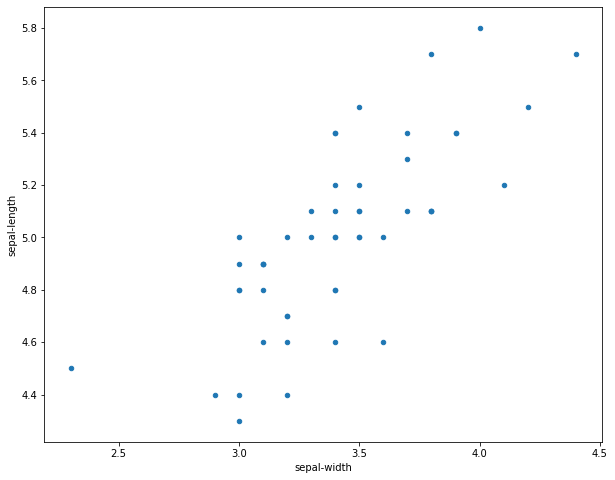

In [29]:
# Try some of them here. 
# For example, try to plot scatter graphs for the Iris-setosa class:
dataset.get_group("Iris-setosa").plot.scatter(x='sepal-width', y='sepal-length') 
#Imy comment: Don't need to specify that I am using plt, the command is plot.scatter

## 4) Classification using Least Squares

Here we will be carrying out classification using the least squares formulation on 2 classes of the dataset. 

a) Create separate datasets for the classes 'Iris-setosa' and 'Iris-versicolor'.

In [30]:
setosa = dataset.get_group("Iris-setosa").dropna()
versicolor = dataset.get_group("Iris-versicolor").dropna()
#Only classifying two of the species
#Least squares takes the diffrences betwen the output and the true vlaue
#Here defining that the true values are 1 and -1

b) create an output vector $Y^k$, for each class, where $y_i^k = 1$ if $k = $'Iris-setosa' and $-1$ otherwise.

In [49]:
# Insert code here to update 'setosa' and 'versicolor' DataFrames to include an extra column 'output'.
setosa["output"] = 1
versicolor["output"] = -1
dataframe_new = setosa+versicolor #combine the two together back into one dataset
dataframe_new.shape
#Do we then need to combine the datasets again

#The recommended way to do it:
#setosa_y = list(np.tile(np.array([1]), [len(setosa)])) #Creates a 50x1 matrix of 1's 
#setosa['output'] = setosa_y #Then add that 50x1 matrix onto the setosa matrix we already had
assert setosa.shape == (50, 5)
assert versicolor.shape == (50, 5)

c) create training and test datasets, with 20% of the data for testing (80 training points and 20 testing points). 

In [50]:
# Make sure that data from each class is equally distributed.
# Create 'training_data' and 'test_data' DataFrames that contain the appropriate number of samples from each class.
#CDM: from sklearn.model_selection import train_test_split
#CDM: X_train, X_test, y_train, y_test = train_test_split(dataframe_new, y, test_size=0.2) #Same as we used in CDM

training_data = dataframe_new.sample(80) #Random sample of 80 training points

#Create a mask to get a set that is the training set
_mask = dataframe_new.isin(training_data)
test_data = dataframe_new[~_mask].dropna()

assert training_data.shape == (80, 5)
assert test_data.shape == (20, 5)

AssertionError: 

d) apply the least squares solution to obtain an optimal solution for different combinations of the 4 available attributes.

In [ ]:
# Create all possible combinations of attributes. 
# Have a look at online answers for this - was long
from itertools import chain, combinations

def all_combinations(attributes):
    return chain(*map(lambda i: combinations(attributes, i), range(1, len(attributes)+1)))

_attributes = [name for name in column_names if name != 'class']
attribute_combinations = all_combinations(_attributes) #Note that this is an iterable object. 

# Complete the function that takes in a list of attributes, and outputs the predictions after carrying out least squares.
def return_predictions(attributes, training_data=training_data, testing_data=test_data):    
    
    
    return predictions

e) evaluate which input attributes are the best.

In [ ]:
# Complete the function below that takes in a predictions vector, and outputs the mean squared error.
def return_mse(predictions, testing_data=test_data):
    
    
    return mse

# evaluate
for attributes in attribute_combinations:
    preds = return_predictions(list(attributes))
    print(f"{str(attributes):<70} MSE: {return_mse(preds)}")
    
#Np.tile takes a matrix and repeats the rows or columns
    #Put in what you want to repeat, hwo many times to repeat in each direction, and repeats the dataset
#The X Y W function in the asnswers are the same as the ones in the lecture - need to apply it